In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [1]:
import pandas as pd
from sklearn.datasets import load_wine

# Load the wine dataset into a DataFrame
wine_data = load_wine(as_frame=True)
wine_df = wine_data.frame

wine_df.head()

# Display the shape of the DataFrame
print("Shape of the Wine DataFrame:", wine_df.shape)

Shape of the Wine DataFrame: (178, 14)


In [3]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [4]:
wine_df.isnull().sum()  # Check for missing values

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

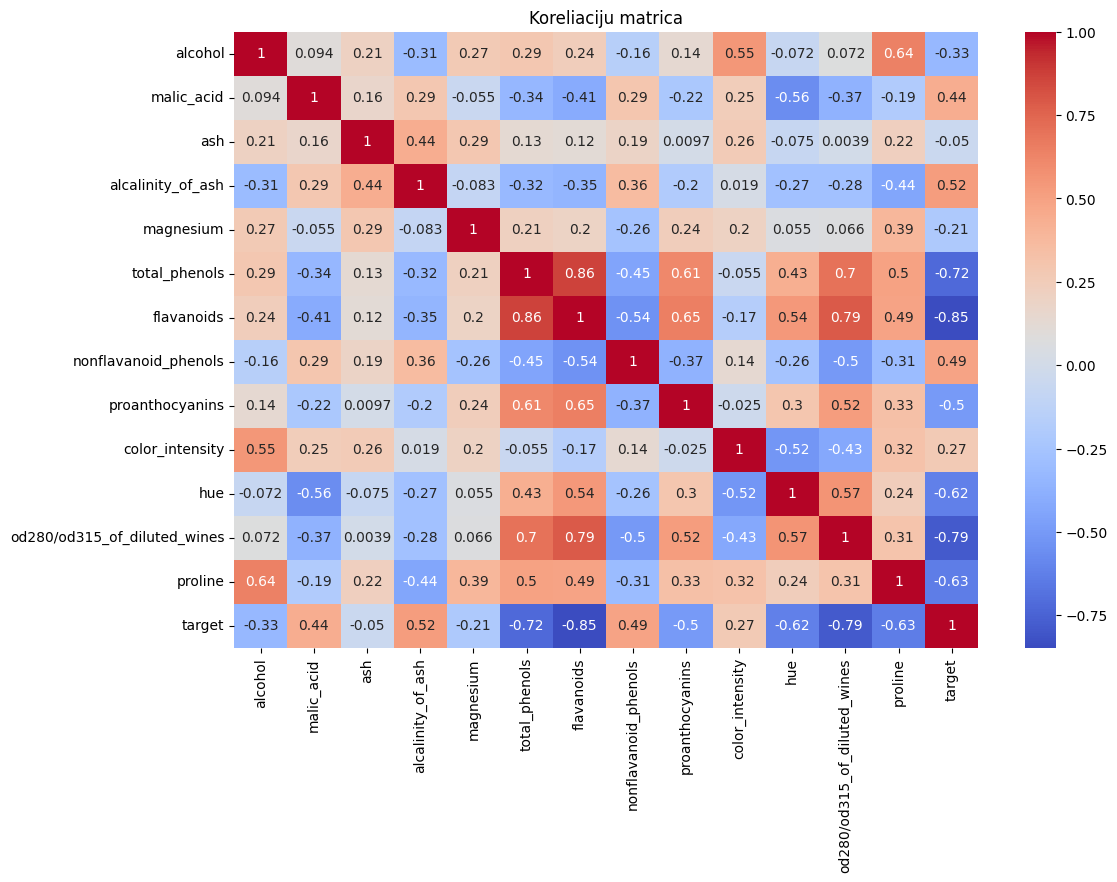

In [6]:
# Užduotis 1: Kurie požymiai koreliuoja labiausiai su namų kaina (medv)?
correlation_matrix = wine_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Koreliaciju matrica')
plt.show

In [9]:
features = ['proline', 'od280/od315_of_diluted_wines', 'hue', 'proanthocyanins', 'flavanoids', 'total_phenols']
X = wine_df[features]
#  intercept reiksme (konstanta)
X = add_constant(X)
# Apskaiciuojame kiekvienam kintamajam VIF rodikli (pagal ji paziurim kurie panasus ir istrinam, kuo aukstesne reiksme VIF tuo maziau reiksminga, vadinasi ta ir ismetam, siuo atveju tax (virs 8))
vif_data = pd.DataFrame()
vif_data["Kintamasis"] = X.columns
vif_data["VIF reikšmė"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                     Kintamasis  VIF reikšmė
0                         const    45.574709
1                       proline     1.392494
2  od280/od315_of_diluted_wines     2.921353
3                           hue     1.556741
4               proanthocyanins     1.784217
5                    flavanoids     6.287027
6                 total_phenols     4.202328


"flavanoids" multikolinearu su "total_phenolis" tad pasiliekam viena reikšmę "flavanoids"

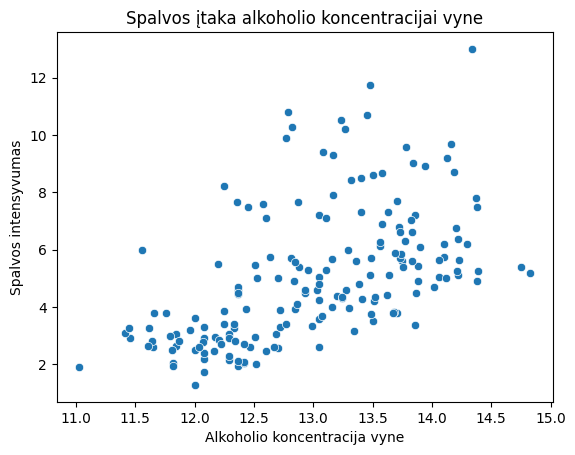

In [13]:
# Užduotis 2: Nubraižykite "rm" (kambarių skaičius) ir "medv" (kaina) sklaidos grafiką
sns.scatterplot(x="alcohol",y='color_intensity', data=wine_df)
plt.title("Spalvos įtaka alkoholio koncentracijai vyne")
plt.xlabel("Alkoholio koncentracija vyne")
plt.ylabel("Spalvos intensyvumas")
plt.show()

In [16]:
X = wine_df[["alcohol"]]
y = wine_df["color_intensity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

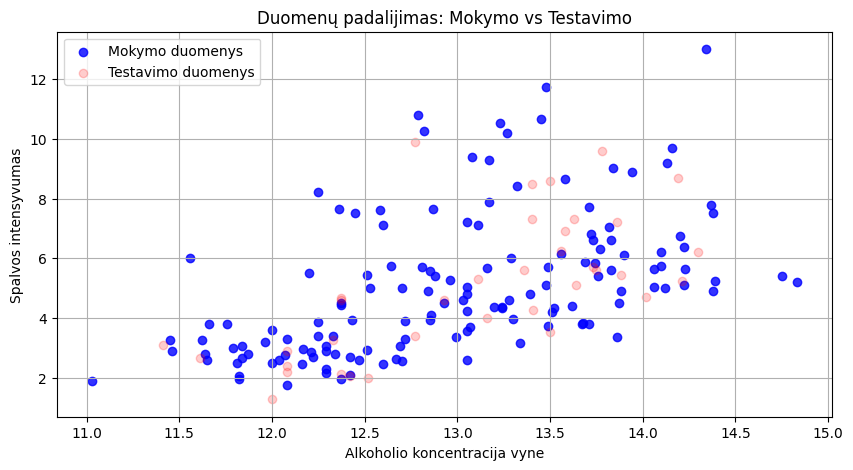

In [17]:
plt.figure(figsize=(10, 5))
 
# Mokymo duomenys (mėlyna)
plt.scatter(X_train, y_train, color="blue", label="Mokymo duomenys", alpha=0.8)
 
# Testavimo duomenys (raudona)
plt.scatter(X_test, y_test, color="red", label="Testavimo duomenys", alpha=0.2)
 
plt.xlabel("Alkoholio koncentracija vyne")
plt.ylabel("Spalvos intensyvumas")
plt.title("Duomenų padalijimas: Mokymo vs Testavimo")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# 5. Modelio kūrimas
model= LinearRegression()
# Modelio apmokymas su mokymo duomenimis
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
# 6. Modelio koeficientai (jei vienas kambarys kaina didėja 9.1 tūkst. dolerių, jei 2 kambariai, tai 18.2 tūkst. dolerių ir t.t.)
print("Modelio koeficientas", model.coef_[0])
print("Interceptas:", model.intercept_)

Modelio koeficientas 1.477781634151235
Interceptas: -14.122647078801064


vadinasi, jei alkoholio koncentracija padidėja 1 vienetu, spalvos intensyvumas padidėja 0.3 vienetu.

In [20]:
# 7. Prognozavimas (patikrinimas ar gerai suprognozavo)
y_pred = model.predict(X_test)

In [21]:
# 8. Vertinimas
print("MSE:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

MSE: 3.036182703834112
R-squared: 0.4098119917589056


kv.saknis MSE 1.73205

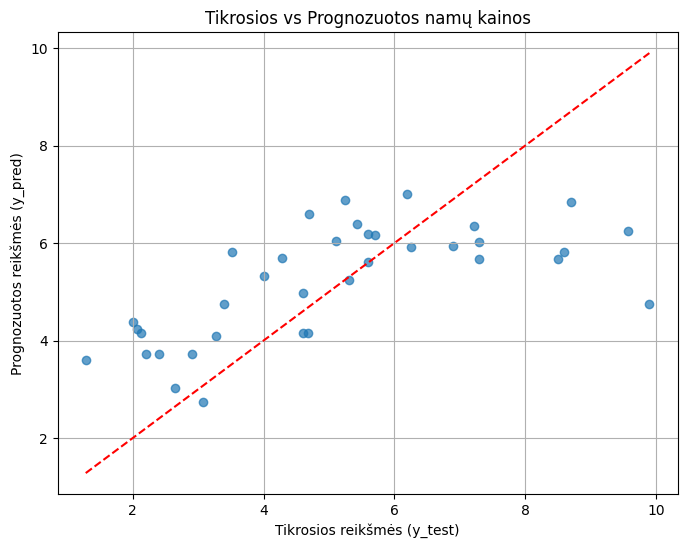

In [ ]:
# 9. Vizualizacija: Tikros vs Prognozuotos kainos

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # tobulas sutapimas
plt.xlabel("Tikrosios reikšmės (y_test)")
plt.ylabel("Prognozuotos reikšmės (y_pred)")
plt.title("Tikrosios vs Prognozuotos namų kainos")
plt.grid(True)
plt.show()

# modelis klysta, nes taskai toli nuo raudonos linijos;

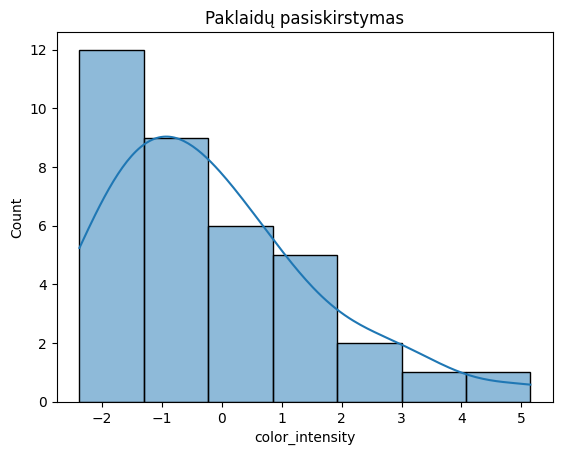

In [ ]:
# 10. Paklaidų analizė
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Paklaidų pasiskirstymas")
plt.show()

# atrodo modelis nenukypsta sistemingai??